<a href="https://colab.research.google.com/github/ayushkumar04/police-killing-usa-data-analysis/blob/main/Fatal_Force_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [1]:
# %pip install --upgrade plotly

## Import Statements

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [4]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames?
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [5]:
df_hh_income.shape

(29322, 3)

In [6]:
df_hh_income.columns

Index(['Geographic Area', 'City', 'Median Income'], dtype='object')

In [7]:
df_hh_income.isna().values.any()

True

In [8]:
df_hh_income.duplicated().values.any()

False

In [9]:
df_pct_poverty.shape

(29329, 3)

In [10]:
df_pct_poverty.columns

Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')

In [11]:
df_pct_poverty.isna().values.any()

False

In [12]:
df_pct_poverty.duplicated().any()

False

In [13]:
df_pct_completed_hs.shape

(29329, 3)

In [14]:
df_pct_completed_hs.columns

Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')

In [15]:
df_pct_completed_hs.isna().values.any()

False

In [16]:
df_pct_completed_hs.duplicated().values.any()

False

In [17]:
df_share_race_city.shape

(29268, 7)

In [18]:
df_share_race_city.columns

Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')

In [19]:
df_share_race_city.isna().values.any()

False

In [20]:
df_share_race_city.duplicated().values.any()

False

In [21]:
df_fatalities.shape

(2535, 14)

In [22]:
df_fatalities.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

In [23]:
df_fatalities.isna().values.any()

True

In [24]:
df_fatalities.duplicated().values.any()

False

## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate.

In [25]:
df_share_race_city.head(3)

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3


In [26]:
# check all the cases below then decide wheater to change it or not

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [27]:
df_pct_poverty.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [28]:
df_pct_poverty.poverty_rate = df_pct_poverty.poverty_rate.str.replace("-", "0")
df_pct_poverty.poverty_rate = pd.to_numeric(df_pct_poverty.poverty_rate)

In [29]:
poverty = df_pct_poverty.groupby(['Geographic Area'], as_index=False).agg({'poverty_rate':pd.Series.mean})
poverty.sort_values('poverty_rate', ascending=False, inplace=True)

In [30]:
h_bar = px.bar(x=poverty['Geographic Area'],
               y=poverty.poverty_rate,

               title='Poverty Rate in US States')
h_bar.update_layout(xaxis_title='Poverty Rate',
                    yaxis_title='Name of State')
h_bar.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [31]:
df_pct_completed_hs.head(3)

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9


In [32]:
df_pct_completed_hs.percent_completed_hs = df_pct_completed_hs.percent_completed_hs.str.replace("-", "0")
df_pct_completed_hs.percent_completed_hs = pd.to_numeric(df_pct_completed_hs.percent_completed_hs)

In [33]:
high_school = df_pct_completed_hs.groupby(['Geographic Area'], as_index=False).agg({'percent_completed_hs':pd.Series.mean})
high_school.sort_values('percent_completed_hs', ascending=False, inplace=True)

In [34]:
h_bar = px.bar(x=high_school['Geographic Area'],
               y=high_school.percent_completed_hs,

               title='Percentage compleated high dchool in US States')
h_bar.update_layout(xaxis_title='Percentage',
                    yaxis_title='Name of State')
h_bar.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [35]:
merged_ph = pd.merge(high_school, poverty, on='Geographic Area', how='inner')
merged_ph.head(3)

,Geographic Area,percent_completed_hs,poverty_rate
0,MA,92.03,9.55
1,HI,91.67,13.40
2,CT,91.59,9.14


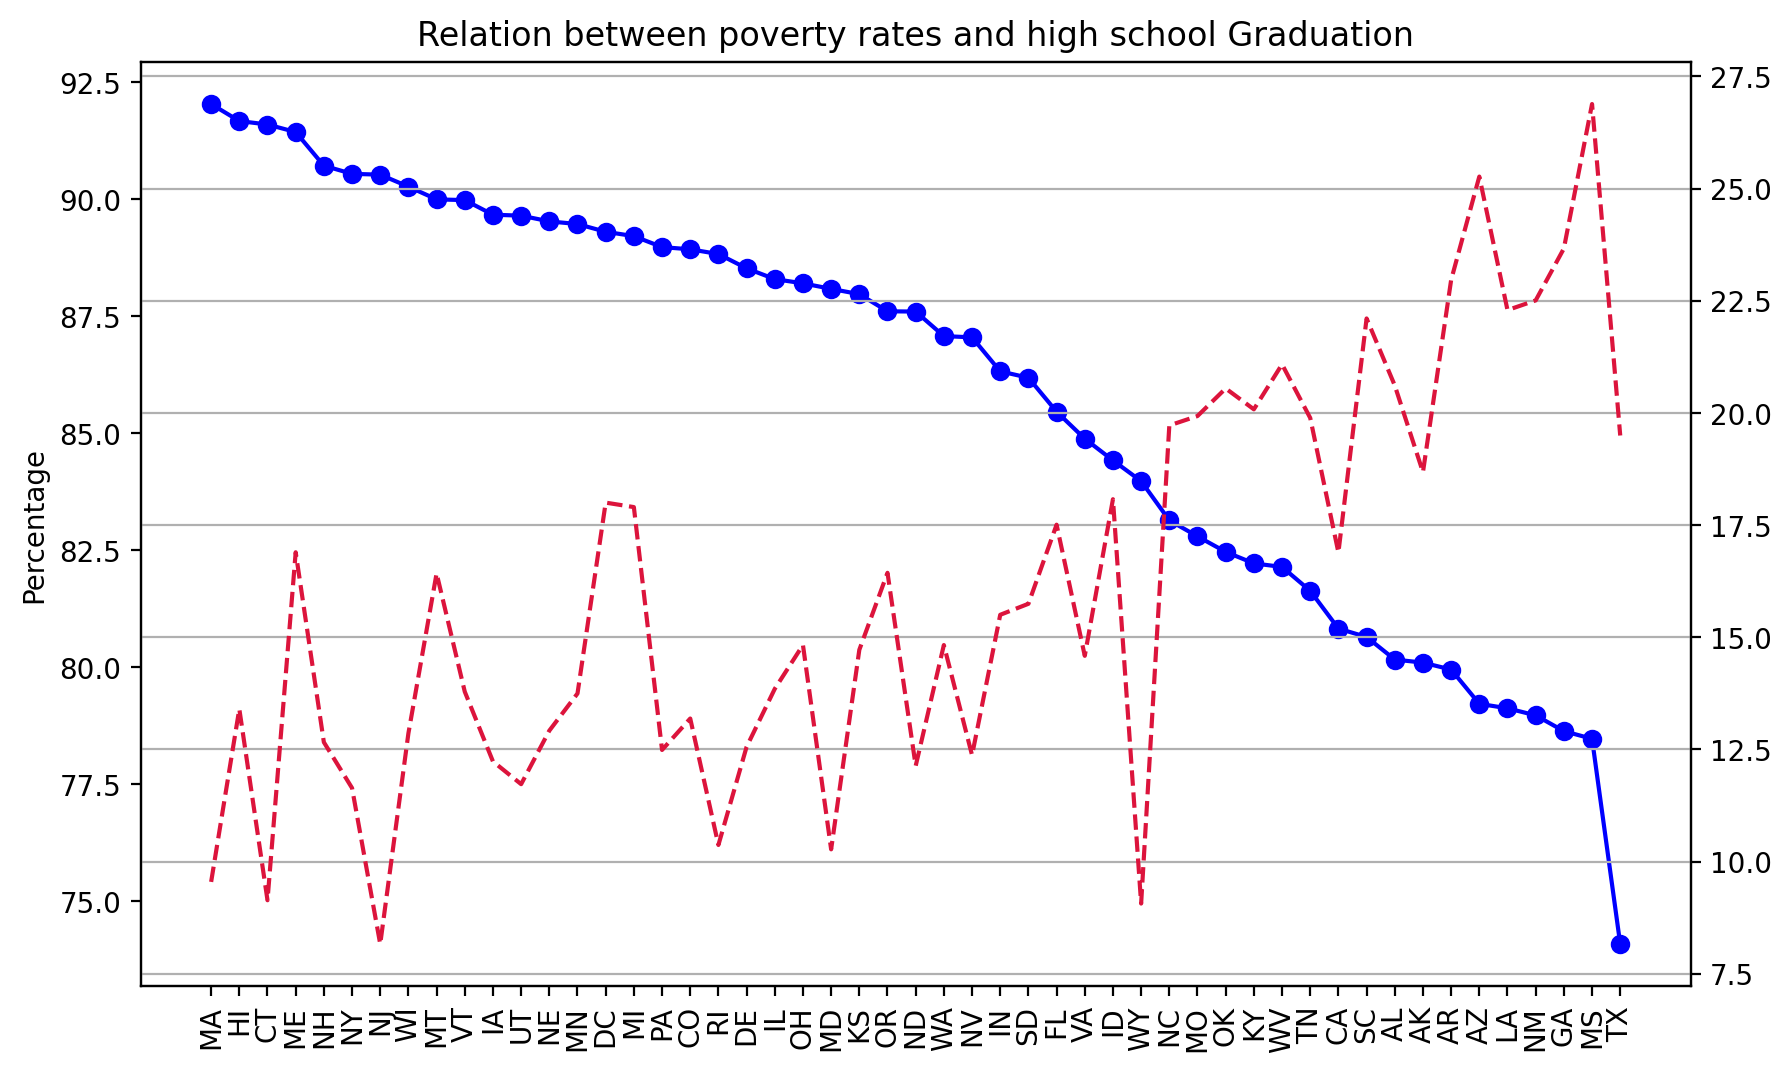

In [36]:
plt.figure(figsize=(10, 6), dpi = 200)
plt.xticks(rotation=90)
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot(merged_ph['Geographic Area'], merged_ph.percent_completed_hs, marker='o', color='b')
ax2.plot(merged_ph['Geographic Area'], merged_ph.poverty_rate, linestyle='--', color='crimson')
plt.title('Relation between poverty rates and high school Graduation')
plt.xlabel('States')
ax1.set_ylabel('Percentage')

plt.grid(True)

plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

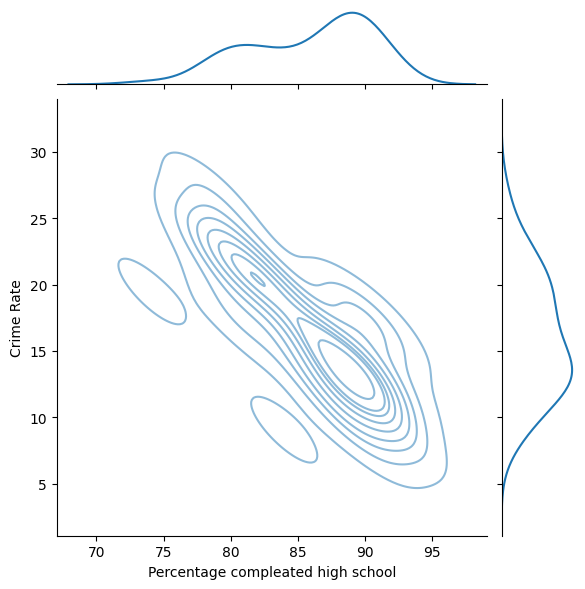

In [37]:
joint=sns.jointplot(
              x=merged_ph.percent_completed_hs,
              y=merged_ph.poverty_rate,
              joint_kws={'alpha': 0.5},
              kind='kde'
)

joint.set_axis_labels('Percentage compleated high school', 'Crime Rate')
plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio.

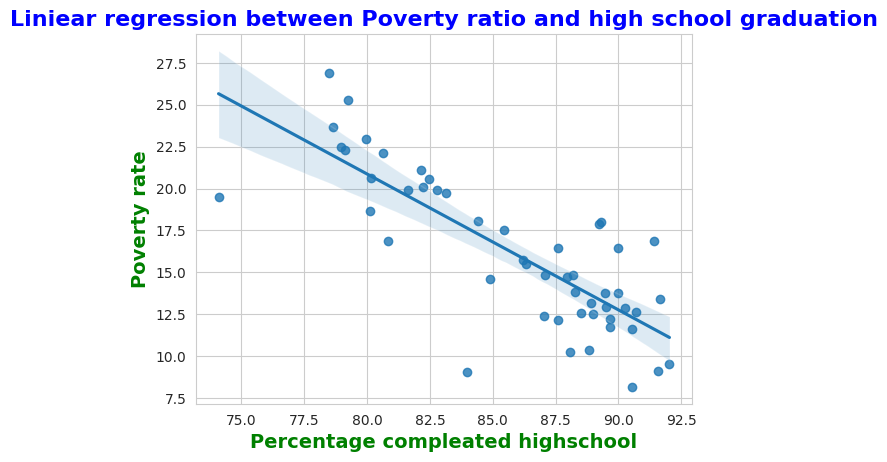

In [38]:
sns.set_style("whitegrid")

sns.regplot(x='percent_completed_hs', y='poverty_rate', data=merged_ph)

plt.title("Liniear regression between Poverty ratio and high school graduation", fontsize=16, fontweight='bold', color='blue')
plt.xlabel("Percentage compleated highschool", fontsize=14, fontweight='bold', color='green')
plt.ylabel("Poverty rate", fontsize=14, fontweight='bold', color='green')

plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections.

In [39]:
df_share_race_city.head(3)

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3


In [40]:
columns = ['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']
# df_share_race_city.share_white = pd.to_numeric(df_share_race_city.share_white)
for column in columns:
  df_share_race_city[column] = df_share_race_city[column].str.replace("(X)","0")
  df_share_race_city[column] = pd.to_numeric(df_share_race_city[column])


In [41]:
df_share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Geographic area        29268 non-null  object 
 1   City                   29268 non-null  object 
 2   share_white            29268 non-null  float64
 3   share_black            29268 non-null  float64
 4   share_native_american  29268 non-null  float64
 5   share_asian            29268 non-null  float64
 6   share_hispanic         29268 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.6+ MB


In [42]:
state_avg = df_share_race_city.groupby('Geographic area').agg({'share_white':pd.Series.mean, 'share_black':pd.Series.mean, 'share_native_american':pd.Series.mean, 'share_asian':pd.Series.mean, 'share_hispanic':pd.Series.mean})

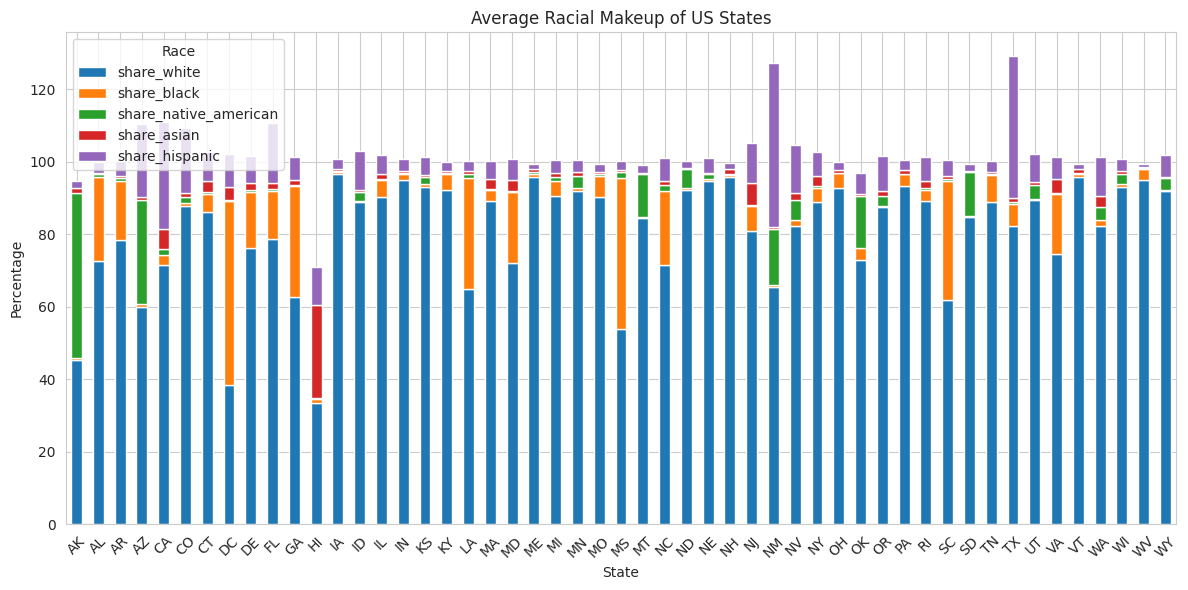

In [43]:
state_avg.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Average Racial Makeup of US States')
plt.xlabel('State')
plt.ylabel('Percentage')

plt.xticks(rotation=45)
plt.legend(title='Race')

plt.tight_layout()
plt.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [44]:
df_fatalities.head(3)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False


In [45]:
killed_br = df_fatalities.groupby(['race'], as_index=False).agg({'name':pd.Series.count})
fig = px.pie(values=killed_br.name, names=killed_br.race, title='No of people killed by race')
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women.

In [46]:
death_men_women = df_fatalities.gender.value_counts()

In [47]:
fig = px.pie(values=death_men_women.values, names=death_men_women.index, title='No of people killed by gender')
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death?

In [48]:
df_fatalities.head(3)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False


In [49]:
fig = px.box(df_fatalities,
             x='manner_of_death',
             y='age',
             color='gender',
             title='How much can a paid ap earn')
fig.update_layout(xaxis_title='manner of death',
                  yaxis_title='age',
                  xaxis={'categoryorder':'min ascending'},
                  yaxis=dict(type='log'))
fig.show()

# Were People Armed?

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed?

In [50]:
df_fatalities.head(3)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False


In [51]:
people_armed = df_fatalities.armed.value_counts()

In [52]:
unarmed_df = df_fatalities[df_fatalities['armed'] == 'unarmed']
unarmed_df.armed.count()

171

In [53]:
percent_armed_killing = round((df_fatalities.armed.count() - unarmed_df.armed.count()) / df_fatalities.armed.count() * 100, 2)
print(f"the percentage of people that were armed are {percent_armed_killing}%")

the percentage of people that were armed are 93.23%


In [54]:
bar = px.bar(x=people_armed.index[:10],
             y=people_armed.values[:10],
             title='Which weapon people were armed with',
             hover_name=people_armed.index[:10],
             color=people_armed.values[:10],
             color_continuous_scale='Agsunset')
bar.update_layout(xaxis_title='Weapon Name',
                  yaxis_title='Number of people',
                  coloraxis_showscale=False)
bar.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [55]:
df_fatalities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

In [56]:
df_fatalities.head(3)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False


In [57]:
num_killed = df_fatalities.age.count()
under25_df = df_fatalities[df_fatalities['age'] < 25]
num_under_25 = under25_df.age.count()
pct25_killed = round(num_under_25 / num_killed * 100, 2)
print(f"Percentage of people killed under 25 is {pct25_killed}%.")

Percentage of people killed under 25 is 18.31%.


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police.

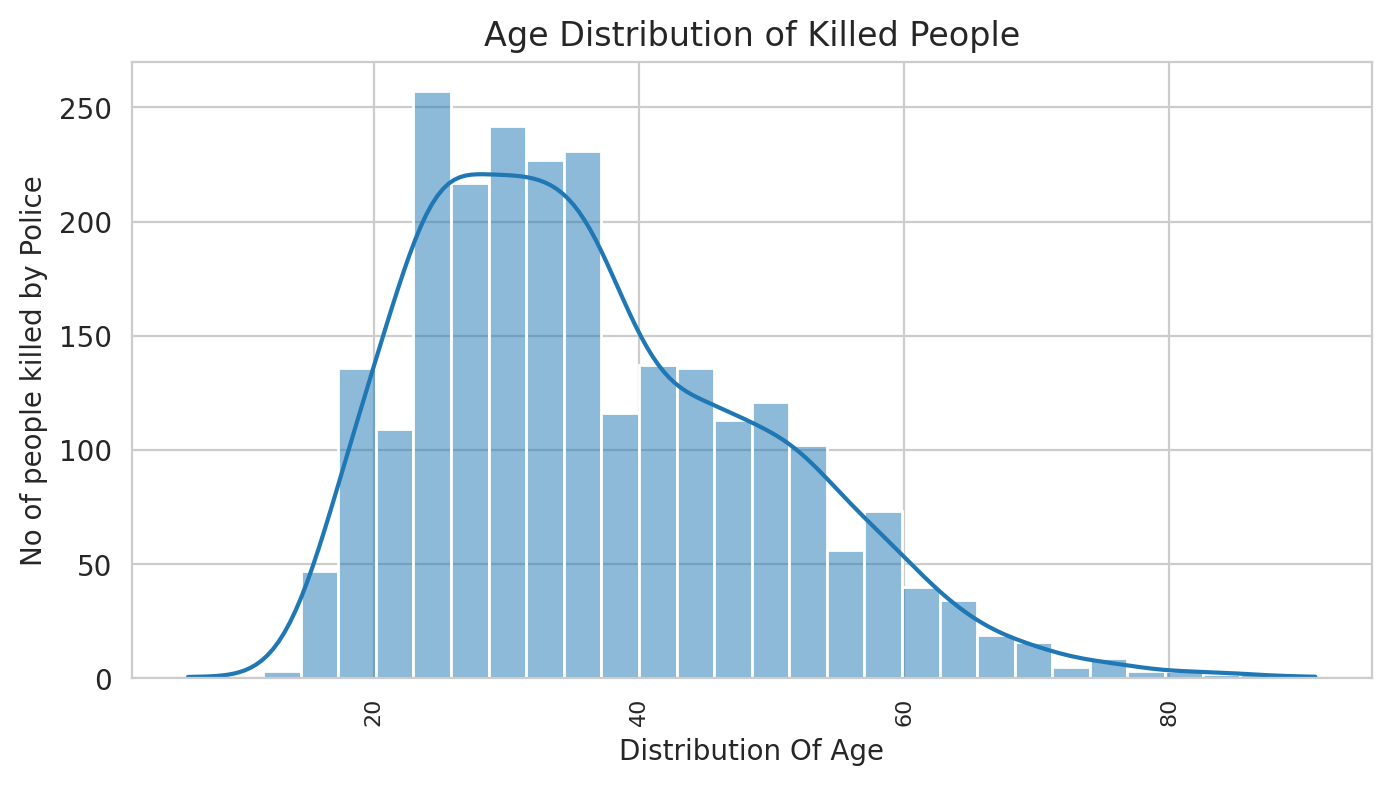

In [58]:
plt.figure(figsize=(8,4), dpi=200)
sns.histplot(df_fatalities.age, bins=30, kde=True)
plt.xticks(fontsize=8, rotation=90)
plt.xlabel('Distribution Of Age')
plt.ylabel('No of people killed by Police')
plt.title('Age Distribution of Killed People')
plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions?

In [59]:
df_fatalities.race.value_counts()

race
W    1201
B     618
H     423
A      39
N      31
O      28
Name: count, dtype: int64

In [60]:
race1 = df_fatalities[df_fatalities['race'] == 'W']


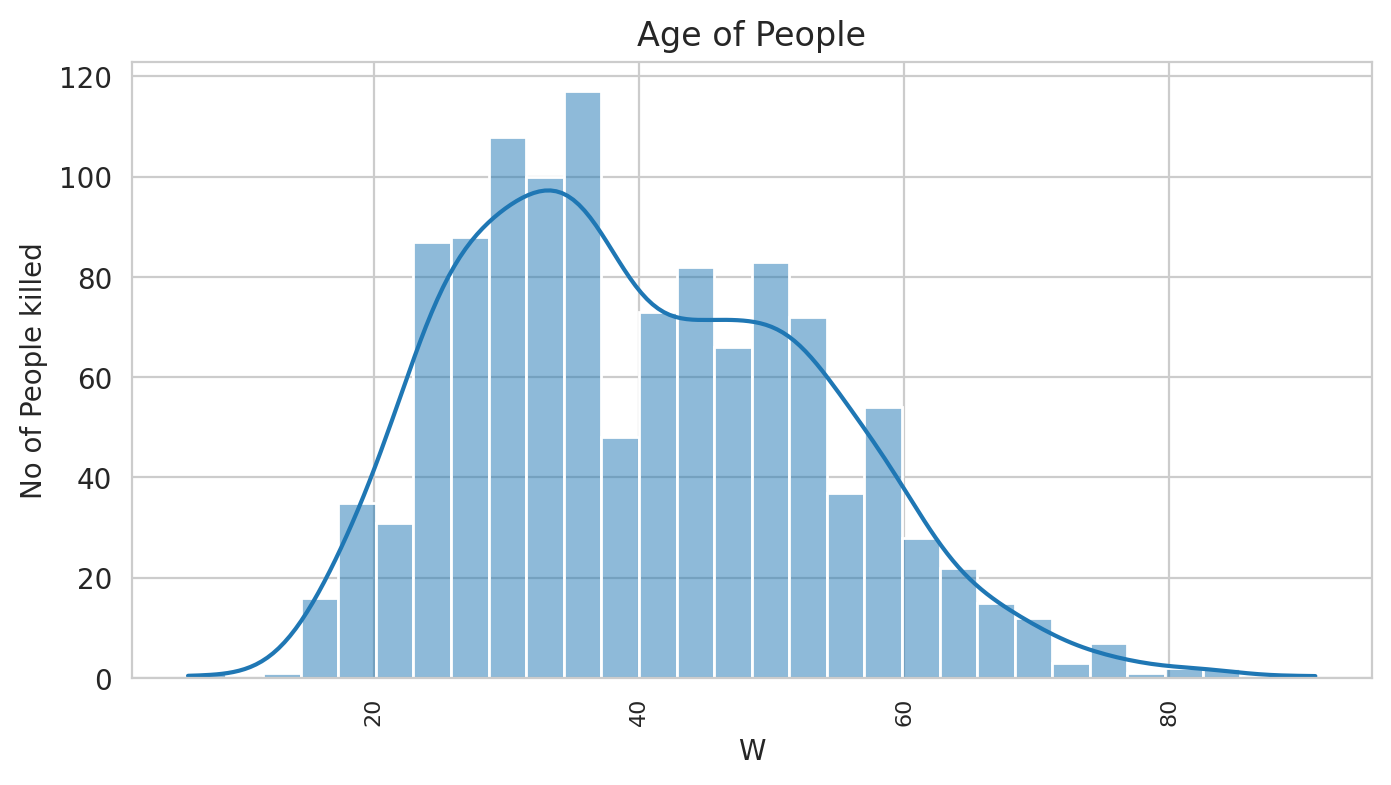

In [61]:
plt.figure(figsize=(8,4), dpi=200)
sns.histplot(race1.age, bins=30, kde=True)
plt.xticks(fontsize=8, rotation=90)
plt.xlabel('W')
plt.ylabel('No of People killed')
plt.title('Age of People')
plt.show()

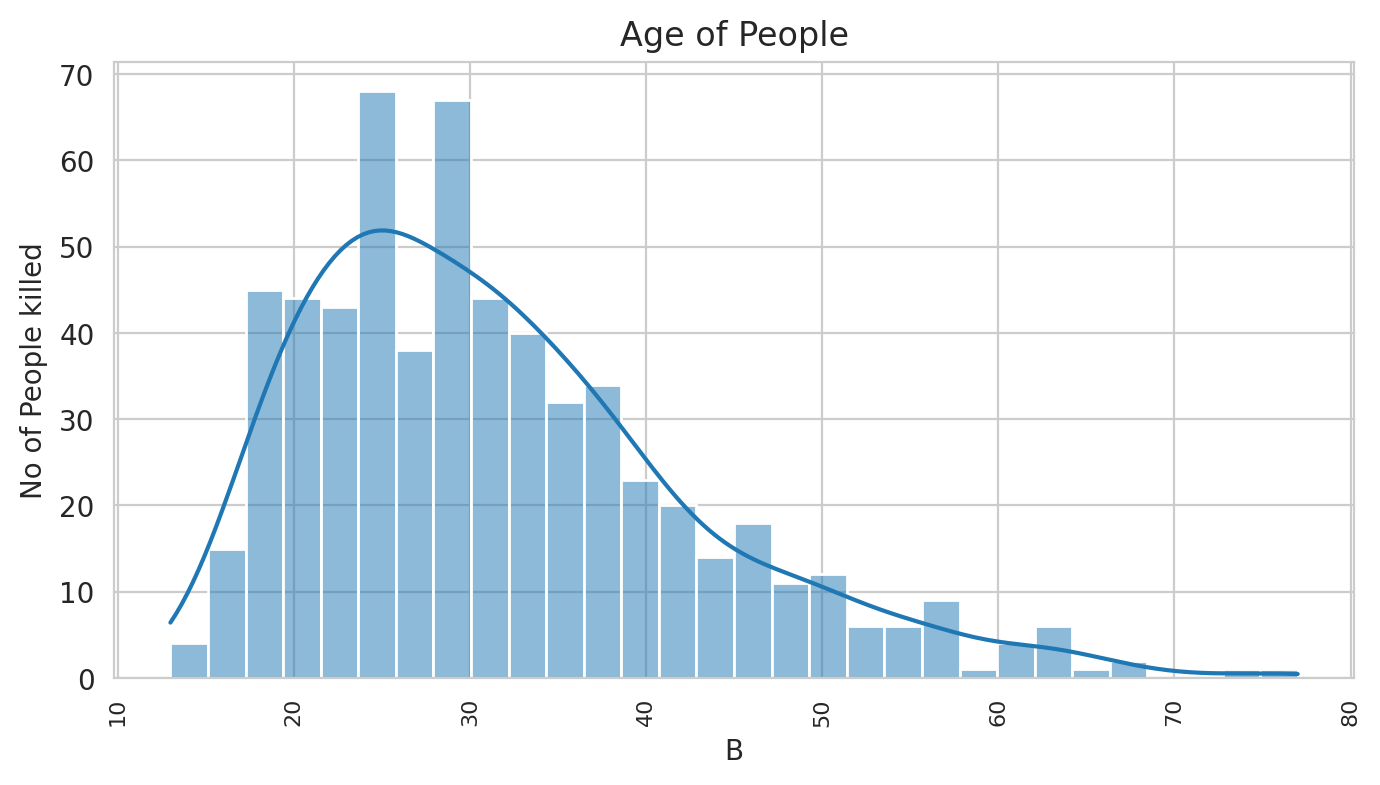

In [62]:
race2 = df_fatalities[df_fatalities['race'] == 'B']
plt.figure(figsize=(8,4), dpi=200)
sns.histplot(race2.age, bins=30, kde=True)
plt.xticks(fontsize=8, rotation=90)
plt.xlabel('B')
plt.ylabel('No of People killed')
plt.title('Age of People')
plt.show()

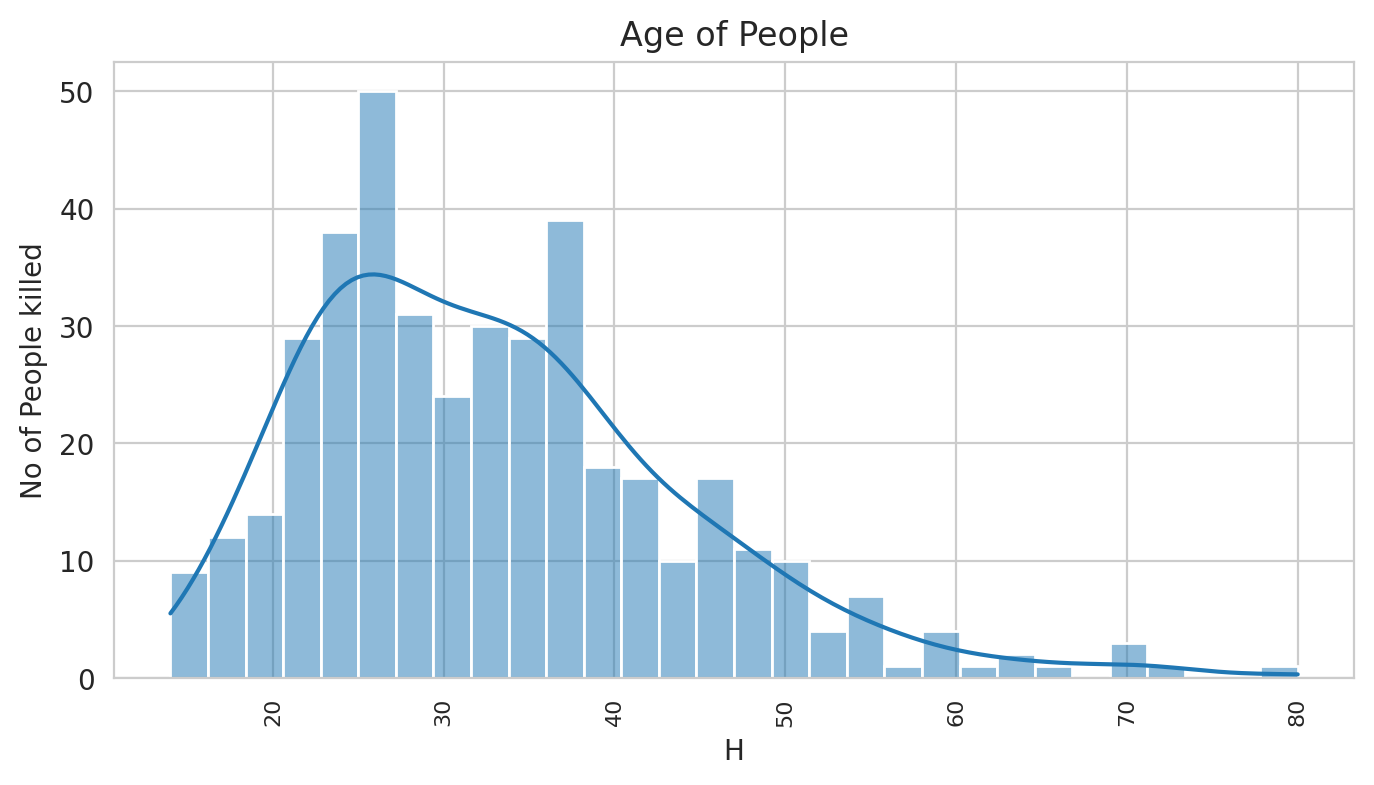

In [63]:
race3 = df_fatalities[df_fatalities['race'] == 'H']
plt.figure(figsize=(8,4), dpi=200)
sns.histplot(race3.age, bins=30, kde=True)
plt.xticks(fontsize=8, rotation=90)
plt.xlabel('H')
plt.ylabel('No of People killed')
plt.title('Age of People')
plt.show()

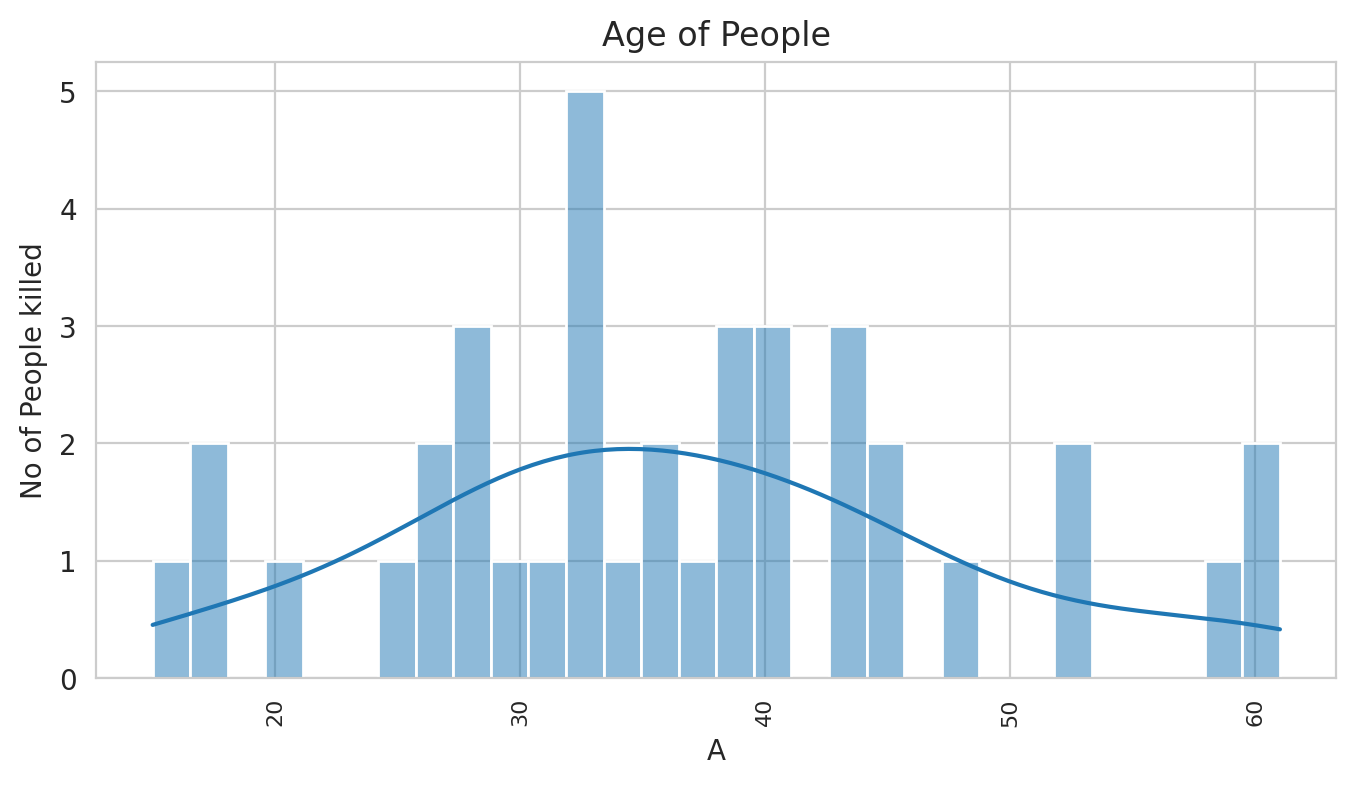

In [64]:
race4 = df_fatalities[df_fatalities['race'] == 'A']
plt.figure(figsize=(8,4), dpi=200)
sns.histplot(race4.age, bins=30, kde=True)
plt.xticks(fontsize=8, rotation=90)
plt.xlabel('A')
plt.ylabel('No of People killed')
plt.title('Age of People')
plt.show()

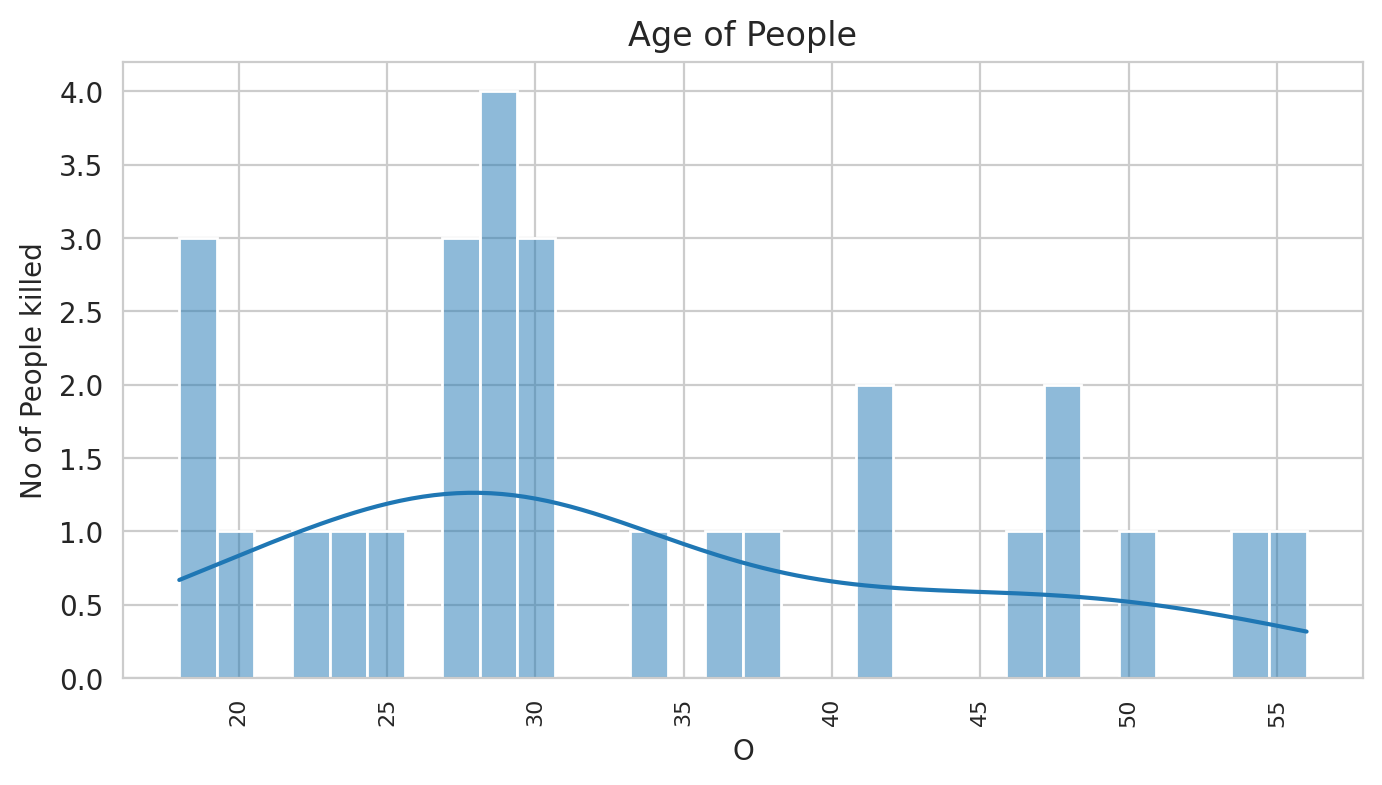

In [65]:
race5 = df_fatalities[df_fatalities['race'] == 'O']
plt.figure(figsize=(8,4), dpi=200)
sns.histplot(race5.age, bins=30, kde=True)
plt.xticks(fontsize=8, rotation=90)
plt.xlabel('O')
plt.ylabel('No of People killed')
plt.title('Age of People')
plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race.

In [66]:
race_kileed = df_fatalities.race.value_counts()

In [67]:
bar = px.bar(x=race_kileed.index,
             y=race_kileed.values,
             title='Which weapon people were armed with',
             hover_name=race_kileed.index,
             color=race_kileed.values,
             color_continuous_scale='Agsunset')
bar.update_layout(xaxis_title='Race',
                  yaxis_title='Number of people killed',
                  coloraxis_showscale=False)
bar.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [68]:
num_m_total = df_fatalities.signs_of_mental_illness.count()

In [69]:
is_mental = df_fatalities[df_fatalities['signs_of_mental_illness'] == True]
num_mental = is_mental.signs_of_mental_illness.count()
pct_mental = round(num_mental / num_m_total * 100, 2)

In [70]:
print(f'The percentage of people with mental illness killed are {pct_mental}%')

The percentage of people with mental illness killed are 24.97%


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [71]:
df_fatalities.head(2)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False


In [72]:
top10_city = df_fatalities.groupby(['city'], as_index=False).agg({'threat_level': pd.Series.count, 'race':pd.Series.value_counts})
top10_city.sort_values('threat_level', ascending=False, inplace=True)
top10_city.head(2)

,city,threat_level,race
732,Los Angeles,39,"[19, 10, 6, 1]"
995,Phoenix,31,"[12, 11, 3, 2]"


In [73]:
bar = px.bar(x=top10_city.city[:10],
             y=top10_city.threat_level[:10],
             title='Top 10 City in Crime',
             hover_name=top10_city.city[:10],
             color=top10_city.threat_level[:10],
             color_continuous_scale='Agsunset')
bar.update_layout(xaxis_title='Name of city',
                  yaxis_title='Number of people killed',
                  coloraxis_showscale=False)
bar.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city.

In [74]:
top10_city.head()

,city,threat_level,race
732,Los Angeles,39,"[19, 10, 6, 1]"
995,Phoenix,31,"[12, 11, 3, 2]"
578,Houston,27,"[15, 6, 3, 1, 1]"
241,Chicago,25,"[21, 2, 1]"
687,Las Vegas,21,"[9, 5, 3]"


In [75]:
df_fatalities.head(3)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False


In [90]:
df_fatalities[df_fatalities['city'] == 'Phoenix']['race'].value_counts()

race
W    12
H    11
N     3
B     2
Name: count, dtype: int64

In [91]:
city_counts = df_fatalities['city'].value_counts()

In [93]:
top_cities = city_counts.nlargest(10).index
top_cities

Index(['Los Angeles', 'Phoenix', 'Houston', 'Chicago', 'Las Vegas',
       'San Antonio', 'Columbus', 'Austin', 'Miami', 'St. Louis'],
      dtype='object', name='city')

In [95]:
top_cities_df = df_fatalities[df_fatalities['city'].isin(top_cities)]
top_cities_df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,year
12,22,Hashim Hanif Ibn Abdul-Rasheed,2015-01-07,shot,knife,41.00,M,B,Columbus,OH,True,other,Not fleeing,False,2015
40,75,Pablo Meza,2015-01-17,shot,gun,24.00,M,H,Los Angeles,CA,False,attack,Not fleeing,False,2015
48,90,Isaac Holmes,2015-01-21,shot,gun,19.00,M,B,St. Louis,MO,False,attack,Not fleeing,False,2015
52,336,Robert Francis Mesch,2015-01-23,shot,gun,61.00,M,W,Austin,TX,True,attack,Not fleeing,False,2015
64,348,Nicolas Leland Tewa,2015-01-27,shot,vehicle,26.00,M,N,Phoenix,AZ,False,other,Not fleeing,False,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2508,2793,Isaiah Perkins,2017-07-20,shot,gun,27.00,M,B,St. Louis,MO,False,attack,Car,False,2017
2515,2798,Jerrod Kershaw,2017-07-24,shot,gun,31.00,M,W,St. Louis,MO,True,attack,Car,False,2017
2520,2804,TK TK,2017-07-26,shot,gun,35.00,M,NaN,Phoenix,AZ,False,attack,Other,False,2017
2521,2806,TK TK,2017-07-26,shot,gun,NaN,M,NaN,San Antonio,TX,False,attack,Not fleeing,False,2017


In [103]:
city_race_distribution = top_cities_df.groupby('city')['race'].value_counts(normalize=True).unstack().fillna(0)
city_race_distribution.head()

race,A,B,H,N,O,W
city,,,,,,
Austin,0.00,0.17,0.11,0.00,0.00,0.72
Chicago,0.00,0.88,0.04,0.00,0.00,0.08
Columbus,0.00,0.61,0.00,0.00,0.06,0.33
Houston,0.04,0.58,0.23,0.04,0.00,0.12
Las Vegas,0.00,0.18,0.29,0.00,0.00,0.53


In [100]:
city_race_distribution.columns = ['A', 'B', 'H', 'N', 'O', 'W']
city_race_distribution.index.name = 'city'
city_race_distribution.reset_index(inplace=True)

In [101]:
city_race_distribution.head(2)

,city,A,B,H,N,O,W
0,Austin,0.00,0.17,0.11,0.00,0.00,0.72
1,Chicago,0.00,0.88,0.04,0.00,0.00,0.08


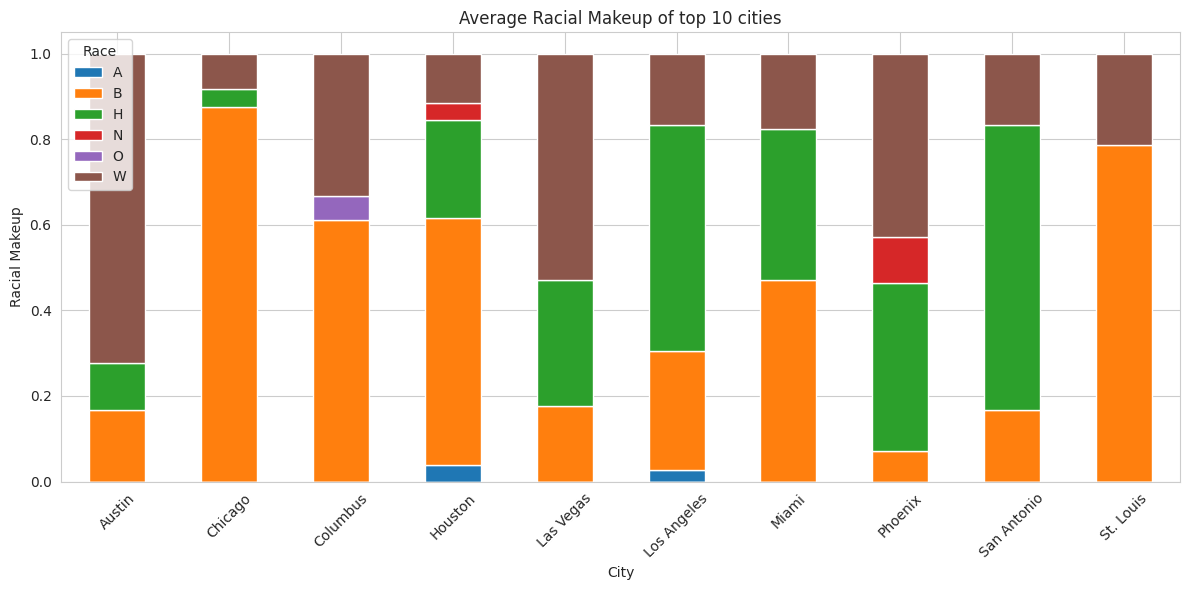

In [104]:
city_race_distribution.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Average Racial Makeup of top 10 cities')
plt.xlabel('City')
plt.ylabel('Racial Makeup')

plt.xticks(rotation=45)
plt.legend(title='Race')

plt.tight_layout()
plt.show()

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty?

In [76]:
df_fatalities.head(3)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False


In [77]:
df_map = df_fatalities.groupby('state')['manner_of_death'].count()
df_map_reset = df_map.reset_index()
df_map_reset.columns = ['state', 'value']
df_map_reset.head()

,state,value
0,AK,15
1,AL,50
2,AR,26
3,AZ,118
4,CA,424


In [78]:
fig = px.choropleth(df_map_reset,
                    locations='state',
                    locationmode='USA-states',
                    color='value',
                    color_continuous_scale = px.colors.sequential.matter)
fig.update_layout(coloraxis_showscale=True)

fig.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data?

In [79]:
df_fatalities.date = pd.to_datetime(df_fatalities.date, format='%d/%m/%y')

In [80]:
df_fatalities['year'] = df_fatalities.date.dt.year

In [81]:
df_fatalities.head(3)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,year
0,3,Tim Elliot,2015-01-02,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False,2015
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False,2015
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False,2015


In [82]:
death_by_year = df_fatalities.groupby('year')['manner_of_death'].count()

In [83]:
bar = px.bar(x=death_by_year.index,
             y=death_by_year.values,
             title='Number of Police killing over time',
             hover_name=death_by_year.index,
             color=death_by_year.values,
             color_continuous_scale='Agsunset')
bar.update_layout(xaxis_title='Years',
                  yaxis_title='Number of People Killed',
                  coloraxis_showscale=False)
bar.show()

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).